In [1]:
import torch
import torch.nn as nn
import torchvision
import torchshow as ts
import ImageProcessing as ip
import os
import cv2 as cv 
import mnist_cnn
import importlib

In [2]:
net = mnist_cnn.cnn()
net.load_state_dict(torch.load('trained_cnn.pth', weights_only=True))

<All keys matched successfully>

In [3]:
def load_images(image_folder):
    image_paths = os.listdir(image_folder)
    if ".DS_Store" in image_paths:
        image_paths.remove(".DS_Store")
    image_paths = [f"{image_folder}/{image}" for image in image_paths]
    images = [torchvision.io.decode_image(path) for path in image_paths]
    return images

In [4]:
def load_images_with_labels(image_folder):
    image_paths = os.listdir(image_folder)
    if ".DS_Store" in image_paths:
        image_paths.remove(".DS_Store")
    image_paths = [f"{image_folder}/{image}" for image in image_paths]
    images = [torchvision.io.decode_image(path) for path in image_paths]
    labels = []
    for path in image_paths:
        _, label = path.split('(')
        label = int(label[0])
        labels.append(label)
    return images, labels

In [5]:
def load_dida_images_with_labels(dida_folder):
    image_paths = os.listdir(dida_folder)
    if ".DS_Store" in image_paths:
        image_paths.remove(".DS_Store")
    labels = []
    images = []
    for path in image_paths:
        label = path[0]
        labels.append(int(label))
        image = torchvision.io.decode_image(f"DIDA/{path}")
        images.append(image)
    return images, labels

In [6]:
# Tester preprocess v1 accuracy på alle testset
image_folder = "preprocess_testset"
images, labels = load_images_with_labels(image_folder)
image_count = len(images)
test_set = zip(images,labels)
correct_predictions = 0
for idx, (image, label) in enumerate(test_set):
    image = ip.preprocess_stack_v1(image)
    # ts.save(image, f'stack1_images/{idx}.jpg')
    pred = net(image).argmax().item()
    if pred == label:
        correct_predictions += 1
acc = (correct_predictions / image_count) * 100
print(f"V1 Accuracy: {acc:.2f}%")

V1 Accuracy: 55.88%


In [7]:
# Tester preprocess v2 accuracy på eget testset
import ImageProcessing
importlib.reload(ImageProcessing) 
# Tester preprocess v2 på alle billeder
image_folder = "preprocess_testset"
images, labels = load_images_with_labels(image_folder)
image_count = len(images)
test_set = zip(images,labels)
correct_predictions = 0
for idx, (image, label) in enumerate(test_set):
    image = ip.preprocess_stack_v2(image)
    # ts.save(image, f'stack2_images/{idx}.jpg')
    pred = net(image).argmax().item()
    if pred == label:
        correct_predictions += 1
acc = (correct_predictions / image_count) * 100
print(f"V2 Accuracy: {acc:.2f}%")

V2 Accuracy: 82.35%


In [13]:
import ImageProcessing
importlib.reload(ImageProcessing) 
# Tester preprocess v1 accuracy på DIDA testset
images, labels = load_dida_images_with_labels("DIDA")
image_count = len(images)
test_set = zip(images,labels)
correct_predictions = 0
for idx, (image, label) in enumerate(test_set):
    image = ip.preprocess_stack_v1(image)
    # ts.save(image, f'stack1_images/{idx}.jpg')
    pred = net(image).argmax().item()
    if pred == label:
        correct_predictions += 1
acc = (correct_predictions / image_count) * 100
print(f"V1 DIDA Accuracy: {acc:.2f}%")

V1 DIDA Accuracy: 29.80%


In [14]:
import ImageProcessing
importlib.reload(ImageProcessing) 
# Tester preprocess v2 accuracy på DIDA testset
images, labels = load_dida_images_with_labels("DIDA")
image_count = len(images)
test_set = zip(images,labels)
correct_predictions = 0
for idx, (image, label) in enumerate(test_set):
    image = ip.preprocess_stack_v2(image)
    # ts.save(image, f'stack1_images/{idx}.jpg')
    pred = net(image).argmax().item()
    if pred == label:
        correct_predictions += 1
acc = (correct_predictions / image_count) * 100
print(f"V2 DIDA Accuracy: {acc:.2f}%")

V2 DIDA Accuracy: 53.65%


tensor(1)


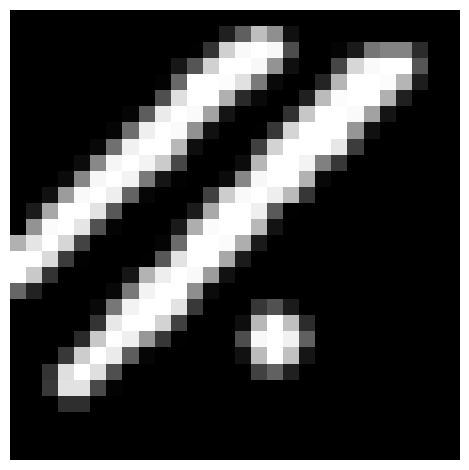

In [10]:
# Single image testing
import ImageProcessing
importlib.reload(ImageProcessing) 
image_folder = "DIDA/"
images = load_images(image_folder)
image = images[10]
image = ip.preprocess_stack_v2(image)
ts.show(image)
print(net(image).argmax())

8
8
2
6
8
3
1
2


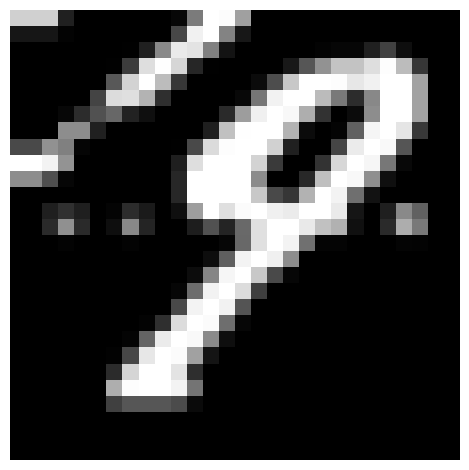

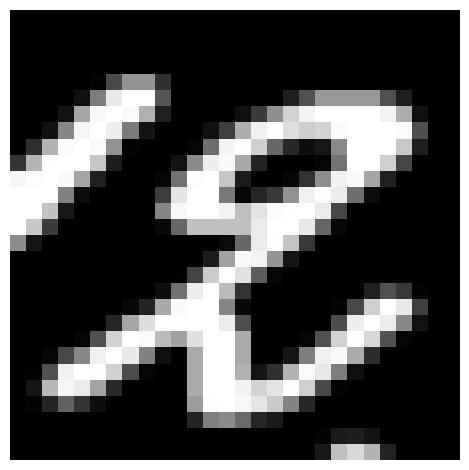

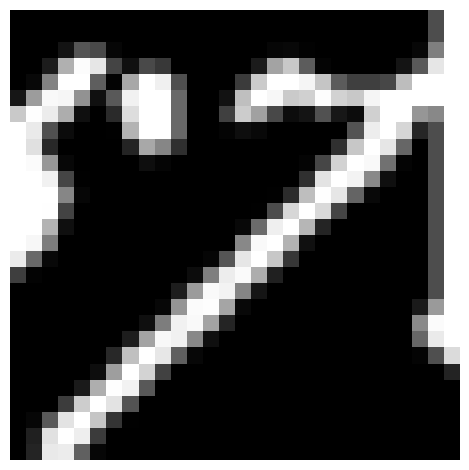

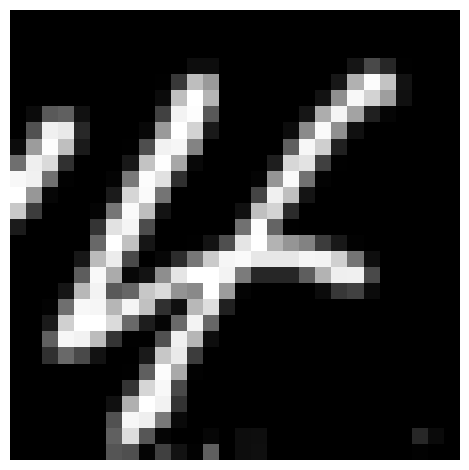

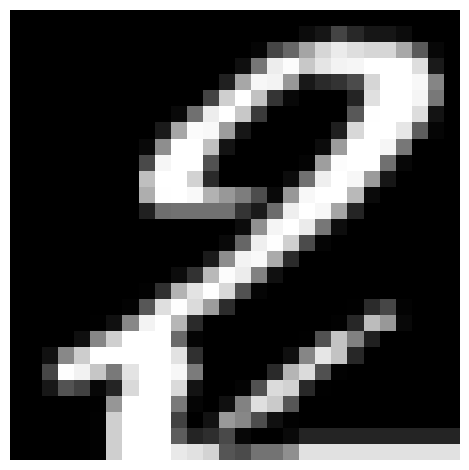

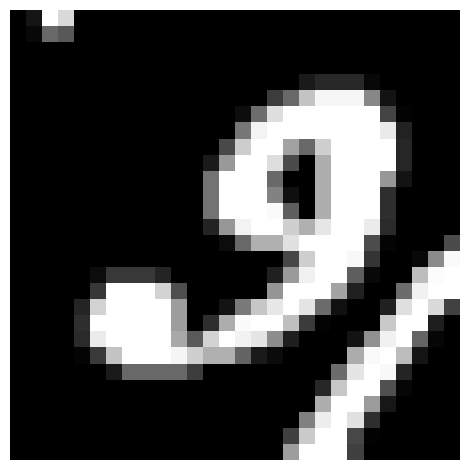

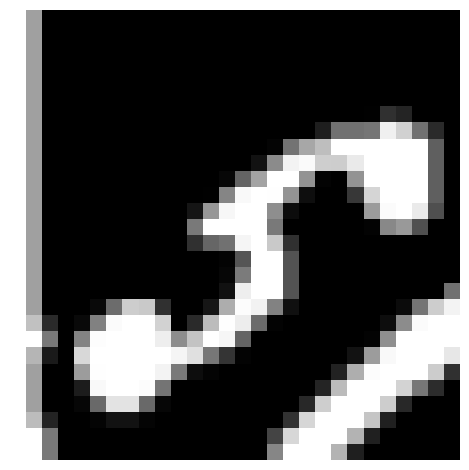

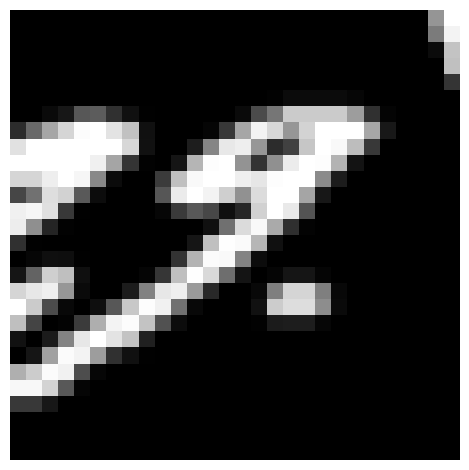

In [12]:
# Viser billeder modellen stadig fejler på
import ImageProcessing
importlib.reload(ImageProcessing) 
# Tester preprocess v2 på alle billeder
image_folder = "DIDA"
images, labels = load_dida_images_with_labels(image_folder)
image_count = (images)
test_set = zip(images,labels)
for idx, (image, label) in enumerate(test_set):
    if idx >= 20:
        break
    image = ip.preprocess_stack_v2(image)
    pred = net(image).argmax().item()
    if pred != label:
        print(pred)
        ts.show(image)
